# Battle of the Cities: Data Visualization
### Goals:

* __bar chart of rent prices by neighborhood for each city__
* ~~__find median rent for 2018 and 2018 per neighborhood per city__~~ only concerned with current prices.
* ~~is rent price above national average? (folium)~~
    * looking at two of the most expensive cities in the country, this may not give much insight
    * overall average? normalize data to see how it deviates from the mean
* is rent prive above city average? (folium)(City_Rank)
    * ex: "This neighorhood is affordable relative to other Manhattan neighborhoods.

* label neighborhoods: Affordable, Average, Expensive within city and within whole dataset
    * ex: General Rank = Expensive, City Rank = Affordable
    * "This neighborhood is expensive relative to both San Francisco and Manhattan but affordable for Manhattan.
* box plots

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import folium
from folium import plugins
import geopandas as gpd

In [55]:
rent_data = pd.read_csv('rent_data_clean.csv', index_col = 0)
rent_data.head(2)

,City,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Upper West Side,New York,4395.0,4300.0,4354.0,4531.0,4632.0,4606.0,4471.0,4288.0,4157.0,...,4166.0,4256.0,4214.0,4148.0,4109.0,4086.0,4071.0,4061.0,4030.0,4053.0
Upper East Side,New York,4606.0,4384.0,4401.0,4622.0,4823.0,4744.0,4546.0,4367.0,4236.0,...,4254.0,4361.0,4341.0,4240.0,4141.0,4038.0,3944.0,3905.0,3899.0,3941.0


Since I'm only concerned with current rent prices, I'll only use the current median rents for September 2019.

In [56]:
rent_data = rent_data[["City", "2019-09"]]
rent_data.rename(columns={"2019-09":"Median_Rent"}, inplace=True)

In [57]:
nyc_data = rent_data[rent_data["City"] == "New York"]
sf_data = rent_data[rent_data["City"] == "San Francisco"]

In [58]:
rent_data.to_csv('rent_data_19.csv')
nyc_data.to_csv('nyc_data.csv')
sf_data.to_csv('sf_data.csv')

## Plots

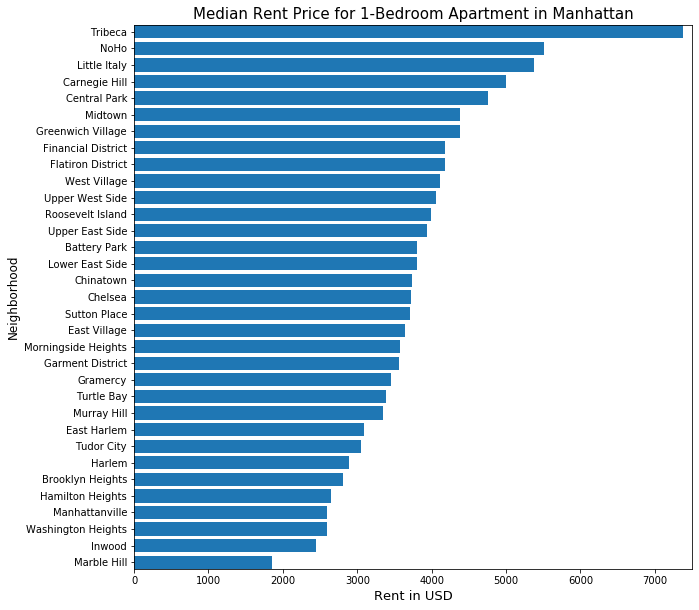

In [59]:
nyc_sort = nyc_data.copy()
nyc_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 10))

plt.barh(nyc_sort.index, nyc_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in Manhattan", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,7500)
plt.ylabel("Neighborhood", size=12)

plt.show()

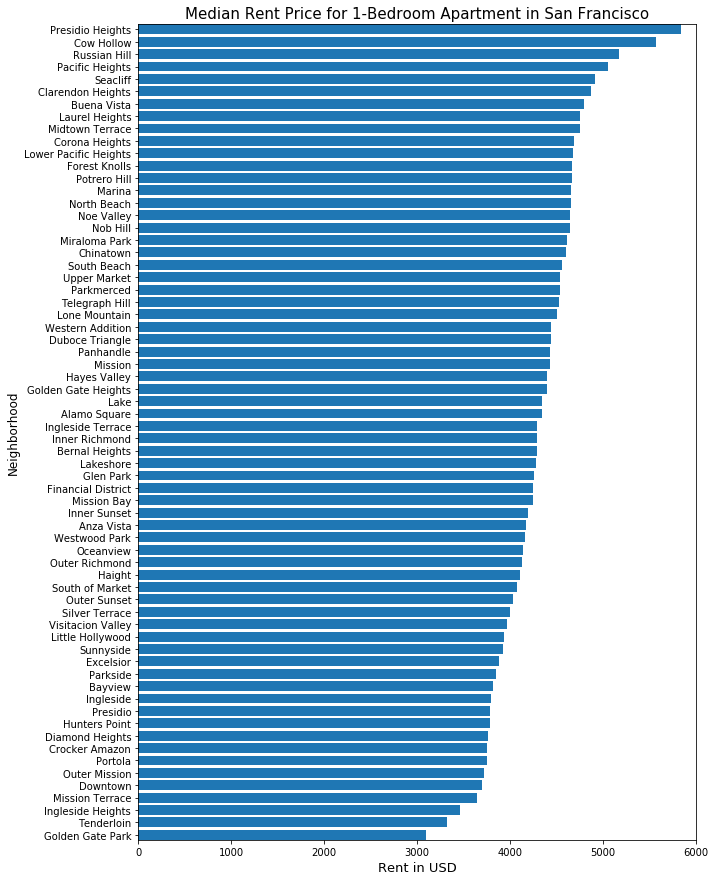

In [60]:
sf_sort = sf_data.copy()
sf_sort.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 15))

plt.barh(sf_sort.index, sf_sort.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in San Francisco", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,6000)
plt.ylabel("Neighborhood", size=12)

plt.show()

## Data Distribution

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\deand\Anaconda3\envs\default\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


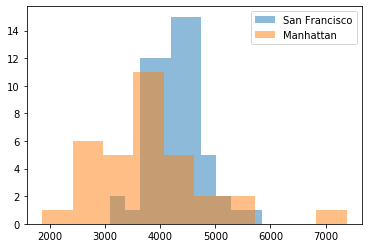

In [61]:
plt.hist(sf_data["Median_Rent"], alpha=0.5, label='San Francisco')
plt.hist(nyc_data["Median_Rent"], alpha=0.5, label='Manhattan')
plt.legend(loc='upper right')
plt.show()

The data distribution is for Manhattan right skewed and normal-ish for San Francisco. Since I know I'll be performing K-Means Clustering, I'll need to normalize my data so that my large-scale data points will not dominate the clustering process. This will also allow me to compare neighborhoods from San Francisco to Manhattan and vice versa. I'll normalize each neighborhood by city and then normalize across both cities using z-scores.

## Normalization

## Maps

In [62]:
sf_geo = gpd.read_file(
    'SF_Find_Neighborhoods.geojson',
    driver='GeoJSON'
)
sf_geo.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,(POLYGON ((-122.4934552679999 37.7835181710000...
1,None,Lake Street,(POLYGON ((-122.4871507149999 37.7837854270000...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,(POLYGON ((-122.4775801709999 37.8109931130000...
3,None,Presidio Terrace,(POLYGON ((-122.4724105299999 37.7873465390000...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,(POLYGON ((-122.4726257899999 37.7863148060000...


In [63]:
hoods = sf_data.index.tolist()

missing = []
for h in hoods:
    if h not in sf_geo.name.to_list():
        missing.append(h)
        
missing

['Ingleside Heights',
 'Haight',
 'Laurel Heights',
 'Lake',
 'Downtown',
 'Ingleside Terrace',
 'Presidio']

In [64]:
map_hoods = sf_geo.name.to_list()
map_hoods.sort()
map_hoods

['Alamo Square',
 'Anza Vista',
 'Apparel City',
 'Aquatic Park / Ft. Mason',
 'Ashbury Heights',
 'Balboa Terrace',
 'Bayview',
 'Bernal Heights',
 'Bret Harte',
 'Buena Vista',
 'Candlestick Point SRA',
 'Castro',
 'Cathedral Hill',
 'Cayuga',
 'Central Waterfront',
 'Chinatown',
 'Civic Center',
 'Clarendon Heights',
 'Cole Valley',
 'Corona Heights',
 'Cow Hollow',
 'Crocker Amazon',
 'Diamond Heights',
 'Dogpatch',
 'Dolores Heights',
 'Downtown / Union Square',
 'Duboce Triangle',
 'Eureka Valley',
 'Excelsior',
 'Fairmount',
 'Financial District',
 'Fishermans Wharf',
 'Forest Hill',
 'Forest Knolls',
 'Glen Park',
 'Golden Gate Heights',
 'Golden Gate Park',
 'Haight Ashbury',
 'Hayes Valley',
 'Holly Park',
 'Hunters Point',
 'India Basin',
 'Ingleside',
 'Ingleside Terraces',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Laguna Honda',
 'Lake Street',
 'Lakeshore',
 'Laurel Heights / Jordan Park',
 'Lincoln Park / Ft. Miley',
 'Little Hollywood',
 'Lone Mountain',
 'Low

In [65]:
sf_data.rename({'Ingleside Heights':'Ingleside', 'Haight':'Haight Ashbury',
               'Laurel Heights':'Laurel Heights / Jordan Park', 'Lake':'Lake Street',
               'Downtown':'Downtown / Union Square', 'Ingleside Terrace':'Ingleside Terraces',
               'Presidio':'Presidio National Park'},inplace=True)

sf_data.reset_index()

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Neighborhood,City,Median_Rent
0,Outer Sunset,San Francisco,4030.0
1,Mission,San Francisco,4425.0
2,Outer Richmond,San Francisco,4129.0
3,Inner Richmond,San Francisco,4284.0
4,Parkside,San Francisco,3851.0
...,...,...,...
63,Little Hollywood,San Francisco,3929.0
64,Forest Knolls,San Francisco,4666.0
65,Seacliff,San Francisco,4911.0
66,Presidio National Park,San Francisco,3784.0


In [66]:
sf_merged = pd.merge(sf_geo, sf_data, left_on = 'name', right_on = 'Neighborhood', how = 'left')

In [67]:
sf_merged.drop('link', axis=1,inplace=True)

In [68]:
sf_merged.head()

,name,geometry,City,Median_Rent
0,Seacliff,(POLYGON ((-122.4934552679999 37.7835181710000...,San Francisco,4911.0
1,Lake Street,(POLYGON ((-122.4871507149999 37.7837854270000...,San Francisco,4345.0
2,Presidio National Park,(POLYGON ((-122.4775801709999 37.8109931130000...,San Francisco,3784.0
3,Presidio Terrace,(POLYGON ((-122.4724105299999 37.7873465390000...,NaN,NaN
4,Inner Richmond,(POLYGON ((-122.4726257899999 37.7863148060000...,San Francisco,4284.0


In [69]:
sf_merged.isnull().sum()

name            0
geometry        0
City           50
Median_Rent    52
dtype: int64

In [70]:
state_geo = f'sf-data-merged.geojson'
state_data = sf_merged

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=sf_merged,
    columns=['name', 'Median_Rent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(m)

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','Median_Rent'], aliases=['Neighborhood', 'Median Rent'])
)


m

In [71]:
#bring in data
nyc_geo = gpd.read_file(
    'zillow-nyc.geojson',
    driver='GeoJSON'
)
nyc_geo.head()

,State,County,City,Name,RegionID,geometry
0,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
1,NY,New York,New York,Ellis Island,35472,"POLYGON ((-74.0381999999999 40.69921800000009,..."
2,NY,New York,New York,Washington Heights,198687,POLYGON ((-73.92192594599993 40.85516011100009...
3,NY,New York,New York,Chinatown,193821,POLYGON ((-73.99300676872572 40.71433187712174...
4,NY,New York,New York,Greenwich Village,195133,POLYGON ((-73.98733999497614 40.73372011284643...


In [72]:
print(nyc_data.shape, nyc_geo.shape)

(33, 2) (43, 6)


In [73]:
hoods = nyc_geo.Name.to_list()

missing = []
for h in hoods:
    if h not in nyc_data.index.tolist():
        missing.append(h)
        
missing

['Ellis Island',
 'SoHo',
 'Vinegar Hill',
 'Clinton',
 'Governors Island',
 'Randals-Wards Island',
 'Liberty Island',
 'Mill Rock Park',
 'Stuyvesant Town',
 'Columbus Circle']

In [74]:
hoods.sort()
hoods

['Battery Park',
 'Brooklyn Heights',
 'Carnegie Hill',
 'Central Park',
 'Chelsea',
 'Chinatown',
 'Clinton',
 'Columbus Circle',
 'East Harlem',
 'East Village',
 'Ellis Island',
 'Financial District',
 'Flatiron District',
 'Garment District',
 'Governors Island',
 'Gramercy',
 'Greenwich Village',
 'Hamilton Heights',
 'Harlem',
 'Inwood',
 'Liberty Island',
 'Little Italy',
 'Lower East Side',
 'Manhattanville',
 'Marble Hill',
 'Midtown',
 'Mill Rock Park',
 'Morningside Heights',
 'Murray Hill',
 'NoHo',
 'Randals-Wards Island',
 'Roosevelt Island',
 'SoHo',
 'Stuyvesant Town',
 'Sutton Place',
 'Tribeca',
 'Tudor City',
 'Turtle Bay',
 'Upper East Side',
 'Upper West Side',
 'Vinegar Hill',
 'Washington Heights',
 'West Village']

In [75]:
map_hoods = nyc_geo.Name.to_list()
map_hoods.sort()
map_hoods

['Battery Park',
 'Brooklyn Heights',
 'Carnegie Hill',
 'Central Park',
 'Chelsea',
 'Chinatown',
 'Clinton',
 'Columbus Circle',
 'East Harlem',
 'East Village',
 'Ellis Island',
 'Financial District',
 'Flatiron District',
 'Garment District',
 'Governors Island',
 'Gramercy',
 'Greenwich Village',
 'Hamilton Heights',
 'Harlem',
 'Inwood',
 'Liberty Island',
 'Little Italy',
 'Lower East Side',
 'Manhattanville',
 'Marble Hill',
 'Midtown',
 'Mill Rock Park',
 'Morningside Heights',
 'Murray Hill',
 'NoHo',
 'Randals-Wards Island',
 'Roosevelt Island',
 'SoHo',
 'Stuyvesant Town',
 'Sutton Place',
 'Tribeca',
 'Tudor City',
 'Turtle Bay',
 'Upper East Side',
 'Upper West Side',
 'Vinegar Hill',
 'Washington Heights',
 'West Village']

In [76]:
nyc_data.reset_index(inplace=True)
nyc_data.head()

,Neighborhood,City,Median_Rent
0,Upper West Side,New York,4053.0
1,Upper East Side,New York,3941.0
2,Washington Heights,New York,2589.0
3,Harlem,New York,2890.0
4,East Harlem,New York,3095.0


In [77]:
state_geo = f'zillow-nyc.geojson'
state_data = nyc_data

n = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12
)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=nyc_data,
    columns=['Neighborhood', 'Median_Rent'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(n)

folium.LayerControl().add_to(n)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['Name'])
)

n

In [78]:
#export new data frames
with open('sf-data-merged.geojson', 'w') as f:
    f.write(sf_merged.to_json())
    
with open('nyc-geo.geojson', 'w') as f:
    f.write(nyc_geo.to_json())

In [79]:
nyc_geo.head()

,State,County,City,Name,RegionID,geometry
0,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
1,NY,New York,New York,Ellis Island,35472,"POLYGON ((-74.0381999999999 40.69921800000009,..."
2,NY,New York,New York,Washington Heights,198687,POLYGON ((-73.92192594599993 40.85516011100009...
3,NY,New York,New York,Chinatown,193821,POLYGON ((-73.99300676872572 40.71433187712174...
4,NY,New York,New York,Greenwich Village,195133,POLYGON ((-73.98733999497614 40.73372011284643...


In [80]:
nyc_data.head()

,Neighborhood,City,Median_Rent
0,Upper West Side,New York,4053.0
1,Upper East Side,New York,3941.0
2,Washington Heights,New York,2589.0
3,Harlem,New York,2890.0
4,East Harlem,New York,3095.0


In [81]:
nyc_merged = pd.merge(nyc_geo, nyc_data, left_on = 'Name', right_on = 'Neighborhood', how = 'left')
nyc_merged.head()

,State,County,City_x,Name,RegionID,geometry,Neighborhood,City_y,Median_Rent
0,NY,New York,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...,Roosevelt Island,New York,3986.0
1,NY,New York,New York,Ellis Island,35472,"POLYGON ((-74.0381999999999 40.69921800000009,...",NaN,NaN,NaN
2,NY,New York,New York,Washington Heights,198687,POLYGON ((-73.92192594599993 40.85516011100009...,Washington Heights,New York,2589.0
3,NY,New York,New York,Chinatown,193821,POLYGON ((-73.99300676872572 40.71433187712174...,Chinatown,New York,3742.0
4,NY,New York,New York,Greenwich Village,195133,POLYGON ((-73.98733999497614 40.73372011284643...,Greenwich Village,New York,4374.0


In [82]:
nyc_merged.drop(['State','County','RegionID'], axis=1, inplace=True)
nyc_merged.isnull().sum()

City_x           0
Name             0
geometry         0
Neighborhood    10
City_y          10
Median_Rent     10
dtype: int64

In [83]:
nyc_merged.drop(['Neighborhood','City_y'], axis=1, inplace=True)
nyc_merged

,City_x,Name,geometry,Median_Rent
0,New York,Roosevelt Island,POLYGON ((-73.96143117599991 40.74851331600007...,3986.0
1,New York,Ellis Island,"POLYGON ((-74.0381999999999 40.69921800000009,...",NaN
2,New York,Washington Heights,POLYGON ((-73.92192594599993 40.85516011100009...,2589.0
3,New York,Chinatown,POLYGON ((-73.99300676872572 40.71433187712174...,3742.0
4,New York,Greenwich Village,POLYGON ((-73.98733999497614 40.73372011284643...,4374.0
5,New York,Inwood,POLYGON ((-73.92550434099991 40.87713683500004...,2446.0
6,New York,Harlem,POLYGON ((-73.93371300799993 40.82756209900003...,2890.0
7,New York,Hamilton Heights,POLYGON ((-73.94146109799993 40.83092571400005...,2641.0
8,New York,Marble Hill,POLYGON ((-73.91071526499991 40.87890143900006...,1860.0
9,New York,Carnegie Hill,POLYGON ((-73.95108076152889 40.78595674158065...,4993.0


In [84]:
nyc_merged.rename(columns={'City_x':'City'}, inplace=True)

In [85]:
nyc_merged = nyc_merged.set_index('Name')

In [86]:
transposed = nyc_merged.transpose()

In [87]:
cols = ['Ellis Island', 'Vinegar Hill', 'Brooklyn Heights', 'Randals-Wards Island', 'Central Park',
                        'Governors Island', 'Liberty Island', 'Mill Rock Park']
transposed.drop(cols, axis=1, inplace=True)

In [88]:
transposed

Name,Roosevelt Island,Washington Heights,Chinatown,Greenwich Village,Inwood,Harlem,Hamilton Heights,Marble Hill,Carnegie Hill,East Harlem,...,Murray Hill,Flatiron District,East Village,Manhattanville,NoHo,Tudor City,Chelsea,Gramercy,Stuyvesant Town,Columbus Circle
City,New York,New York,New York,New York,New York,New York,New York,New York,New York,New York,...,New York,New York,New York,New York,New York,New York,New York,New York,New York,New York
geometry,POLYGON ((-73.96143117599991 40.74851331600007...,POLYGON ((-73.92192594599993 40.85516011100009...,POLYGON ((-73.99300676872572 40.71433187712174...,POLYGON ((-73.98733999497614 40.73372011284643...,POLYGON ((-73.92550434099991 40.87713683500004...,POLYGON ((-73.93371300799993 40.82756209900003...,POLYGON ((-73.94146109799993 40.83092571400005...,POLYGON ((-73.91071526499991 40.87890143900006...,POLYGON ((-73.95108076152889 40.78595674158065...,POLYGON ((-73.93335555899995 40.81144500200008...,...,POLYGON ((-73.97682910740397 40.74748235082775...,POLYGON ((-73.99526329090418 40.74984918693477...,"POLYGON ((-73.97183627999986 40.7272132530003,...",POLYGON ((-73.94986002699994 40.81382001400005...,POLYGON ((-73.99124257855696 40.72980725221466...,"POLYGON ((-73.9744906709999 40.75071663400007,...",POLYGON ((-74.00543670099995 40.75728355000007...,POLYGON ((-73.97174754999992 40.73826300500008...,POLYGON ((-73.97469379999991 40.73274734300009...,POLYGON ((-73.99707424899992 40.77407840800004...
Median_Rent,3986,2589,3742,4374,2446,2890,2641,1860,4993,3095,...,3351,4175,3641,2591,5509,3045,3728,3456,NaN,NaN


In [89]:
nyc_merged = transposed.transpose()
nyc_merged

,City,geometry,Median_Rent
Name,,,
Roosevelt Island,New York,POLYGON ((-73.96143117599991 40.74851331600007...,3986
Washington Heights,New York,POLYGON ((-73.92192594599993 40.85516011100009...,2589
Chinatown,New York,POLYGON ((-73.99300676872572 40.71433187712174...,3742
Greenwich Village,New York,POLYGON ((-73.98733999497614 40.73372011284643...,4374
Inwood,New York,POLYGON ((-73.92550434099991 40.87713683500004...,2446
Harlem,New York,POLYGON ((-73.93371300799993 40.82756209900003...,2890
Hamilton Heights,New York,POLYGON ((-73.94146109799993 40.83092571400005...,2641
Marble Hill,New York,POLYGON ((-73.91071526499991 40.87890143900006...,1860
Carnegie Hill,New York,POLYGON ((-73.95108076152889 40.78595674158065...,4993


In [90]:
nyc_merged.reset_index(inplace=True)

In [91]:
with open('nyc-merged.geojson', 'w') as f:
    f.write(nyc_merged.to_json())

In [92]:
nyc_merged.head()

,Name,City,geometry,Median_Rent
0,Roosevelt Island,New York,POLYGON ((-73.96143117599991 40.74851331600007...,3986
1,Washington Heights,New York,POLYGON ((-73.92192594599993 40.85516011100009...,2589
2,Chinatown,New York,POLYGON ((-73.99300676872572 40.71433187712174...,3742
3,Greenwich Village,New York,POLYGON ((-73.98733999497614 40.73372011284643...,4374
4,Inwood,New York,POLYGON ((-73.92550434099991 40.87713683500004...,2446


In [93]:
state_geo = f'nyc-merged.geojson'
state_data = nyc_merged

n = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=12
)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=nyc_data,
    columns=['Neighborhood', 'Median_Rent'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(n)

folium.LayerControl().add_to(n)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['Name'])
)

n

In [94]:
sf_merged.set_index('name', inplace=True)
sf_merged.columns

Index(['geometry', 'City', 'Median_Rent'], dtype='object')

In [95]:
sf_merged.drop(['Lincoln Park / Ft. Miley', 'McLaren Park', 'Golden Gate Park'], axis=0, inplace=True)

In [96]:
sf_merged.reset_index(inplace=True)

In [97]:
sf_merged.name.to_list()

['Seacliff',
 'Lake Street',
 'Presidio National Park',
 'Presidio Terrace',
 'Inner Richmond',
 'Sutro Heights',
 'Outer Richmond',
 'Presidio Heights',
 'Laurel Heights / Jordan Park',
 'Lone Mountain',
 'Anza Vista',
 'Cow Hollow',
 'Union Street',
 'Nob Hill',
 'Marina',
 'Telegraph Hill',
 'Downtown / Union Square',
 'Tenderloin',
 'Civic Center',
 'Hayes Valley',
 'Alamo Square',
 'Panhandle',
 'Haight Ashbury',
 'Lower Haight',
 'Mint Hill',
 'Duboce Triangle',
 'Cole Valley',
 'Rincon Hill',
 'South Beach',
 'South of Market',
 'Showplace Square',
 'Mission Bay',
 'Yerba Buena Island',
 'Treasure Island',
 'Mission Dolores',
 'Castro',
 'Outer Sunset',
 'Parkside',
 'Stonestown',
 'Parkmerced',
 'Lakeshore',
 'Golden Gate Heights',
 'Forest Hill',
 'West Portal',
 'Clarendon Heights',
 'Midtown Terrace',
 'Laguna Honda',
 'Lower Nob Hill',
 'Upper Market',
 'Dolores Heights',
 'Mission',
 'Potrero Hill',
 'Dogpatch',
 'Central Waterfront',
 'Diamond Heights',
 'Crocker Amazon',

In [98]:
with open('sf-data-merged.geojson', 'w') as f:
    f.write(sf_merged.to_json())

In [99]:
state_geo = f'sf-data-merged.geojson'
state_data = sf_merged

m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=sf_merged,
    columns=['name', 'Median_Rent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    bins=4,
    highlight=True,
    legend_name='Median Rent'
    
).add_to(m)

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','Median_Rent'], aliases=['Neighborhood', 'Median Rent'])
)


m